# Exploratory Data Analysis of Netflix Movies and TV Shows

## 1. Introduction

* Purpose of the analysis (why)
* Objectives
* Tools: Python, pandas, matplotlib, seaborn

## 2. Data Overview

* Load dataset (read_csv)
* Display first rows, shape, column names
* Identify data types, null values, duplicates

In [2]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH_FILE = '/home/gustavo/Documents/Data_Carrer/04_github/netflix-eda/netflix_data.csv'

df = pd.read_csv(PATH_FILE, index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, s2 to s7784
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          4812 non-null   object
 1   title         4812 non-null   object
 2   director      4812 non-null   object
 3   cast          4812 non-null   object
 4   country       4812 non-null   object
 5   date_added    4812 non-null   object
 6   release_year  4812 non-null   int64 
 7   duration      4812 non-null   int64 
 8   description   4812 non-null   object
 9   genre         4812 non-null   object
dtypes: int64(2), object(8)
memory usage: 413.5+ KB


In [12]:
df.shape

(4812, 10)

In [11]:
df.head(3)

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action


In [14]:
list_of_columns = df.columns.to_list()
print(list_of_columns)

['type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'duration', 'description', 'genre']


In [17]:
df.describe(include='object')

,type,title,director,cast,country,date_added,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812
unique,2,4812,3615,4690,72,1292,4807,31
top,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",A young Han Solo tries to settle an old score ...,Dramas
freq,4677,1,18,10,1886,100,2,1343


In [18]:
df['type'].value_counts()

type
Movie      4677
TV Show     135
Name: count, dtype: int64

## 3. Data Cleaning

* Handle missing values (e.g., director, cast, country)
* Fix inconsistent data (e.g., trim spaces, unify case)
* Convert types (e.g., date_added → datetime)
* Remove duplicates

In [13]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

## 4. Exploratory Analysis

* Explore main patterns:
* Content type: movies vs. TV shows
* Release year: content trend over time
* Country: top producing countries
* Genre: most frequent genres
* Duration: average runtime or number of seasons
* Include visuals: bar charts, pie charts, countplots, histograms.

### 1. Univariate Analysis

Univariate analysis applied to columns: 'type', 'director', 'country', 'release_year', 'duration', 'genre'

#### 'type' column

In [22]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

There are two categories in the type column: 'Movie' and 'TV Show'

In [23]:
type_freq_abs = df['type'].value_counts().rename_axis('Type').reset_index(name='Count')
type_freq_abs

,Type,Count
0,Movie,4677
1,TV Show,135


In [25]:
type_freq_rel = df['type'].value_counts(normalize=True)
percent = type_freq_rel*100
percent_ = percent.rename_axis('Type').reset_index(name='%')
percent_['%'] = percent_['%'].round(3)
percent_

,Type,%
0,Movie,97.195
1,TV Show,2.805


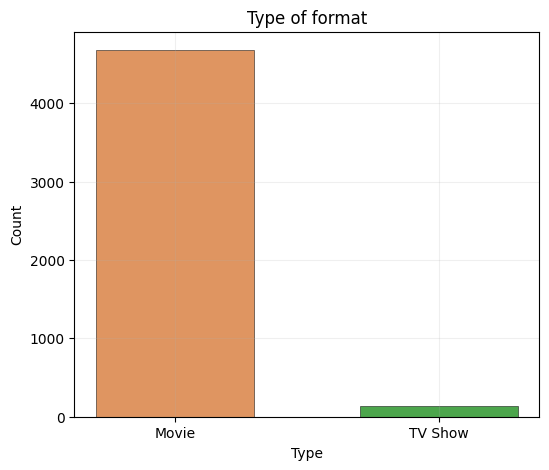

In [51]:
col = ['chocolate', 'green']

plt.figure(figsize=(6,5))
plt.bar(type_freq_abs['Type'], # Categories
        type_freq_abs['Count'], # Count of the Categories
        color=col, # Defined colors
        alpha=0.7, # alpha chanel
        width=0.6, # bars' width 
        edgecolor="#000000", # color for the edges
        linewidth=0.5 # width of the edges
        )

plt.title("Type of format")
plt.xlabel('Type')
plt.ylabel('Count')

plt.grid(alpha=0.2)

plt.show()

There are significantly more Movies than TV Shows in the dataset

#### 'director' column

Directors with 10 or more titles

In [5]:
directors = df['director'].value_counts()
directors[directors >= 10]

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          10
Name: count, dtype: int64

#### 'Country' column 

In [14]:
countries = df['country'].value_counts()
countries_50 = countries[countries>=50].reset_index(name='count')

countries_50

,country,count
0,United States,1886
1,India,864
2,United Kingdom,311
3,Canada,155
4,France,133
5,Spain,112
6,Egypt,91
7,Turkey,81
8,Japan,81
9,Philippines,74


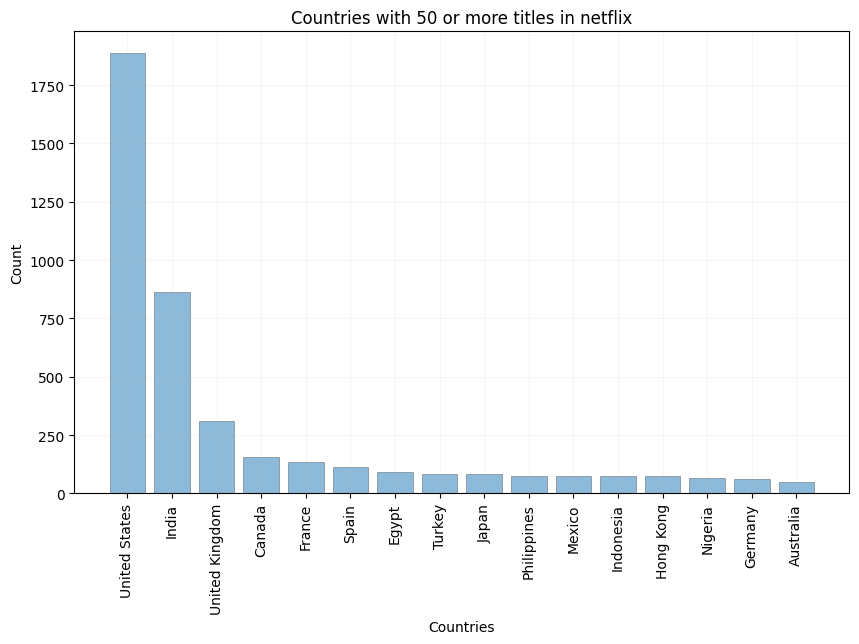

In [30]:
plt.figure(figsize=(10,6))
plt.bar(countries_50['country'],
        countries_50['count'],
        alpha=0.5,
        edgecolor='#000000',
        linewidth = 0.4
        )
plt.xticks(rotation=90)
plt.title("Countries with 50 or more titles in netflix")
plt.ylabel('Count')
plt.xlabel('Countries')
plt.grid(alpha=0.1)
plt.show()

#### 'Release_year' column

In [69]:
titles_since_2015 = df[df['release_year'] >= 2015]
count_titles_since_2015 = titles_since_2015['release_year'].value_counts().sort_index()
count_titles_since_2015 = count_titles_since_2015.reset_index(name='Count')
count_titles_since_2015

,release_year,Count
0,2015,340
1,2016,562
2,2017,646
3,2018,624
4,2019,488
5,2020,379
6,2021,4


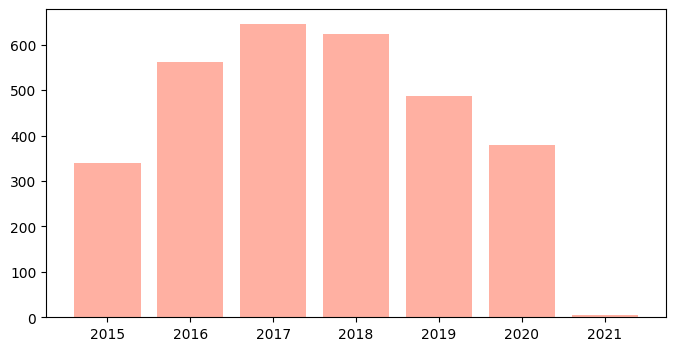

In [74]:
plt.figure(figsize=(8,4))
plt.bar(count_titles_since_2015['release_year'],
        count_titles_since_2015['Count'],
        color='tomato',
        alpha=0.5
        )
plt.show()

## 5. Insights and Observations

* Key findings (e.g., “Most Netflix content is recent; USA dominates production”)
* Highlight 3–5 interesting insights with visuals

## 6. Conclusion

* Summarize the story the data tells
* Mention possible extensions (e.g., correlation with IMDb ratings, dashboard version)

## 7. References (optional)

* Dataset source (Kaggle or public link)
* Libraries used